In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Загружаем данные

In [2]:
df = pd.read_csv("ml100k_ratings.csv", delimiter=";")
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")
df.head()

,user_id,item_id,timestamp,rating
0,u_259,i_255,1997-09-20 03:05:10,4.0
1,u_259,i_286,1997-09-20 03:05:27,4.0
2,u_259,i_298,1997-09-20 03:05:54,4.0
3,u_259,i_185,1997-09-20 03:06:21,4.0
4,u_259,i_173,1997-09-20 03:07:23,4.0


In [3]:
print(f'Duplicates count: {df.duplicated().sum()}\n')
df.info()

Duplicates count: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   user_id    100000 non-null  object        
 1   item_id    100000 non-null  object        
 2   timestamp  100000 non-null  datetime64[ns]
 3   rating     100000 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.1+ MB


In [4]:
n_users = df["user_id"].nunique()
n_items = df["item_id"].nunique()

print("Users:", n_users)
print("Items:", n_items)

Users: 943
Items: 1682


In [5]:
df[['rating', 'timestamp']].describe()

,rating,timestamp
count,100000.000000,100000
mean,3.529860,1997-12-31 00:40:51.488619904
min,1.000000,1997-09-20 03:05:10
25%,3.000000,1997-11-13 19:18:29.500000
50%,4.000000,1997-12-22 21:42:24
75%,4.000000,1998-02-23 18:53:04
max,5.000000,1998-04-22 23:10:38
std,1.125674,NaN


Длина истории пользователей

Min: 20
Max: 737
Mean: 106.04453870625663
Median: 65.0
Variance: 10187.216697849613


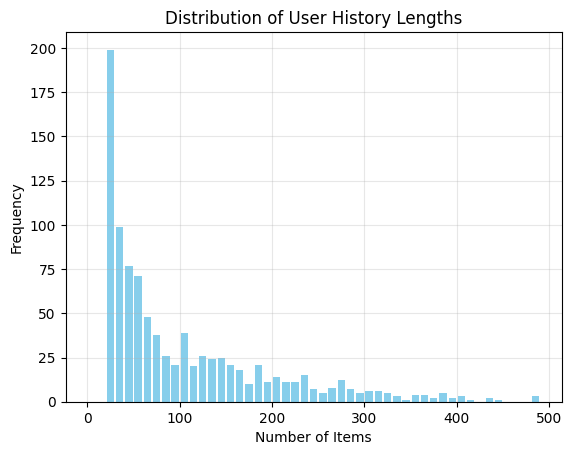

In [6]:
user_history = df.groupby("user_id")["item_id"].count()

print("Min:", user_history.min())
print("Max:", user_history.max())
print("Mean:", user_history.mean())
print("Median:", user_history.median())
print("Variance:", user_history.var())

bins = np.arange(0, 500, 10)

plt.figure()
plt.hist(
    user_history,
    bins=bins,
    rwidth=0.8,
    color="skyblue",     
)
plt.title("Distribution of User History Lengths")
plt.xlabel("Number of Items")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show()

Доля уникальных айтемов в истории пользователя

In [7]:
uniq_items_per_user = df.groupby("user_id")["item_id"].nunique()

unique_share = (uniq_items_per_user / user_history).dropna()

set(unique_share.unique())

{1.0}

Пользователи, повторно оценившие фильм

In [8]:
df.duplicated(subset=["user_id", "item_id"]).sum()

0

Распределение интеракций по времени

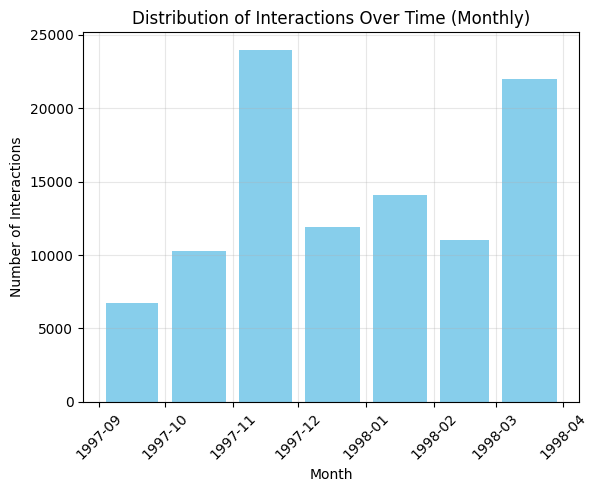

In [9]:
month_counts = (
    df.set_index("timestamp")
      .resample("MS")
      .size()
)

plt.figure()
plt.hist(
    month_counts.index,
    bins=month_counts.index.to_pydatetime(),
    weights=month_counts.values,
    color="skyblue",
    rwidth=0.8,
)
plt.title("Distribution of Interactions Over Time (Monthly)")
plt.xlabel("Month")
plt.ylabel("Number of Interactions")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.show()

Распределение длительности истории пользователей

Min duration (days): 0.001388888888888889
Max duration (days): 212.52990740740742
Mean duration (days): 23.35695166136444
Median duration (days): 0.034270833333333334
Variance (days^2): 2580.87958164078


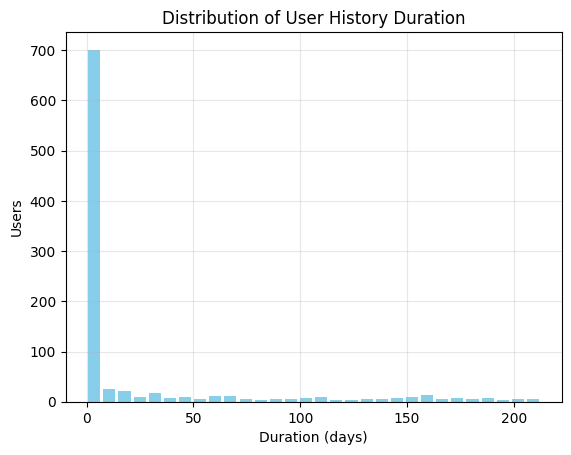

In [10]:
user_span_days = (
    df.groupby("user_id")["timestamp"].max()
    - df.groupby("user_id")["timestamp"].min()
).dt.total_seconds() / 3600 / 24

print("Min duration (days):", user_span_days.min())
print("Max duration (days):", user_span_days.max())
print("Mean duration (days):", user_span_days.mean())
print("Median duration (days):", user_span_days.median())
print("Variance (days^2):", user_span_days.var())

plt.figure()
plt.hist(user_span_days, bins=30, rwidth=0.8, color="skyblue")
plt.title("Distribution of User History Duration")
plt.xlabel("Duration (days)")
plt.ylabel("Users")
plt.grid(True, alpha=0.3)
plt.show()

Статистика по рейтингам

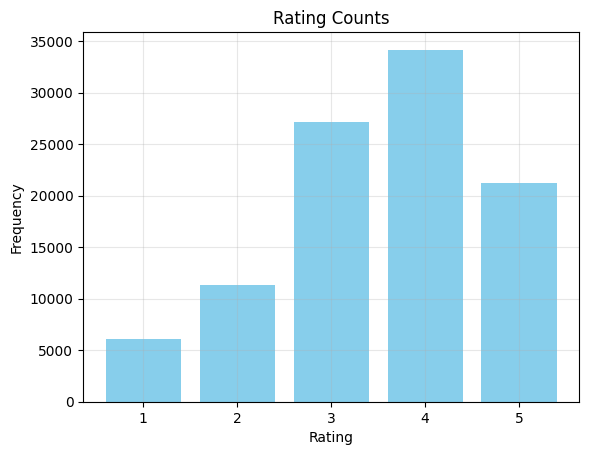

In [11]:
rating_counts = df["rating"].value_counts().sort_index()

plt.figure()
plt.bar(
    rating_counts.index,
    rating_counts.values,
    color="skyblue",
)
plt.title("Rating Counts")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.xticks(rating_counts.index)
plt.grid(True, alpha=0.3)
plt.show()

Статистика по промежуткам между интеракциями

Min (seconds): 0.0000
Max (days): 202.43
Mean (days): 0.22
Std (days): 3.34


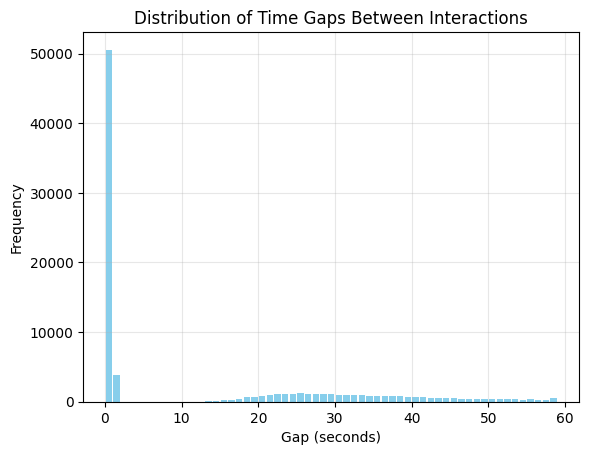

In [12]:
df_sorted = df.sort_values(["user_id", "timestamp"])
df_sorted["time_diff_seconds"] = (
    df_sorted.groupby("user_id")["timestamp"]
    .diff()
    .dt.total_seconds()
)

td = df_sorted["time_diff_seconds"]

print(f"Min (seconds): {td.min():.4f}")
print(f"Max (days): {td.max() / 3600 / 24:.2f}")
print(f"Mean (days): {td.mean() / 3600 / 24:.2f}")
print(f"Std (days): {td.std() / 3600 / 24:.2f}")

bins = np.arange(0, 60, 1)
plt.figure()
plt.hist(
    td.dropna(),
    bins=bins,
    rwidth=0.8,
    color="skyblue",
)
plt.title("Distribution of Time Gaps Between Interactions")
plt.xlabel("Gap (seconds)")
plt.ylabel("Frequency")
plt.grid(True, alpha=0.3)
plt.show()

In [13]:
df_sorted[df_sorted['time_diff_seconds'] == 0]

,user_id,item_id,timestamp,rating,time_diff_seconds
2383,u_1,i_172,1997-09-22 21:57:58,5.0,0.0
2388,u_1,i_196,1997-09-22 22:01:17,5.0,0.0
2391,u_1,i_250,1997-09-22 22:01:46,4.0,0.0
2392,u_1,i_127,1997-09-22 22:01:46,5.0,0.0
2394,u_1,i_117,1997-09-22 22:02:19,3.0,0.0
...,...,...,...,...,...
68678,u_99,i_348,1998-02-03 15:09:22,4.0,0.0
68683,u_99,i_367,1998-02-03 15:17:55,4.0,0.0
69340,u_99,i_273,1998-02-06 15:48:25,5.0,0.0
75782,u_99,i_275,1998-02-26 05:03:39,1.0,0.0


Средние промежутки между интеракциями

Min (seconds): 5.23
Max (days): 7.42
Mean (days): 0.23
Median (seconds): 45.59


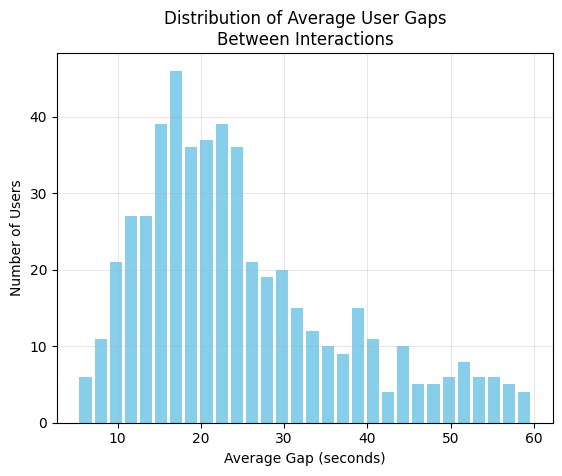

In [14]:
user_avg_gap = (
    df_sorted.groupby("user_id")["time_diff_seconds"]
    .mean()
    .dropna()
)

print(f"Min (seconds): {user_avg_gap.min():.2f}")
print(f"Max (days): {user_avg_gap.max() / 24 / 3600:.2f}")
print(f"Mean (days): {user_avg_gap.mean() / 24 / 3600:.2f}")
print(f"Median (seconds): {user_avg_gap.median():.2f}")

plt.figure()
plt.hist(
    user_avg_gap[user_avg_gap < 60],
    bins=30,
    rwidth=0.8,
    color="skyblue",
)
plt.title("Distribution of Average User Gaps\nBetween Interactions")
plt.xlabel("Average Gap (seconds)")
plt.ylabel("Number of Users")
plt.grid(True, alpha=0.3)
plt.show()

Средние рейтинги с агрегацией по пользователям

Min: 1.492
Max: 4.870
Mean: 3.588
Median: 3.621
Variance: 0.198


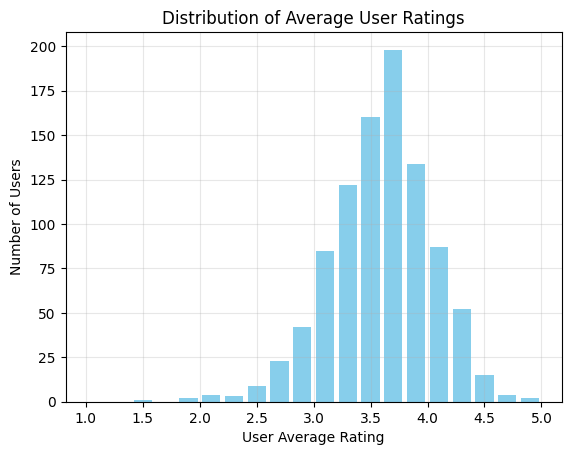

In [15]:
user_avg_rating = df.groupby("user_id")["rating"].mean()

print(f"Min: {user_avg_rating.min():.3f}")
print(f"Max: {user_avg_rating.max():.3f}")
print(f"Mean: {user_avg_rating.mean():.3f}")
print(f"Median: {user_avg_rating.median():.3f}")
print(f"Variance: {user_avg_rating.var():.3f}")

bins = np.arange(1, 5.1, 0.2)

plt.figure()
plt.hist(
    user_avg_rating,
    bins=bins,
    rwidth=0.8,
    color="skyblue",
)
plt.title("Distribution of Average User Ratings")
plt.xlabel("User Average Rating")
plt.ylabel("Number of Users")
plt.xticks(np.arange(1, 5.1, 0.5))
plt.grid(True, alpha=0.3)
plt.show()

"Холодные" айтемы

Items with 1 interaction: 141
Items with <= 3 interactions: 269
Items with <= 5 interactions: 384


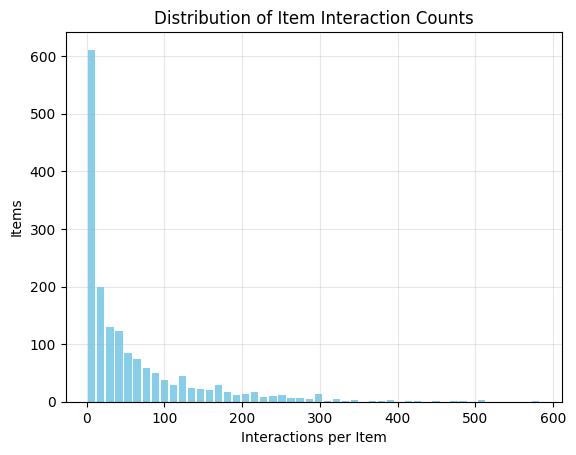

In [16]:
item_counts = df["item_id"].value_counts()

print("Items with 1 interaction:", int((item_counts == 1).sum()))
print("Items with <= 3 interactions:", int((item_counts <= 3).sum()))
print("Items with <= 5 interactions:", int((item_counts <= 5).sum()))

plt.figure()
plt.hist(item_counts.values, bins=50, rwidth=0.8, color="skyblue")
plt.title("Distribution of Item Interaction Counts")
plt.xlabel("Interactions per Item")
plt.ylabel("Items")
plt.grid(True, alpha=0.3)
plt.show()

Популярные айтемы

In [17]:
item_counts = df["item_id"].value_counts()

popular_threshold = item_counts.quantile(0.90)
n_popular = int((item_counts >= popular_threshold).sum())

print("Popular threshold (90th percentile count):", float(popular_threshold))
print("Popular items (>= threshold):", n_popular)

Popular threshold (90th percentile count): 169.0
Popular items (>= threshold): 170


Сравнение трендов числа интеракций и уникальный айтемов

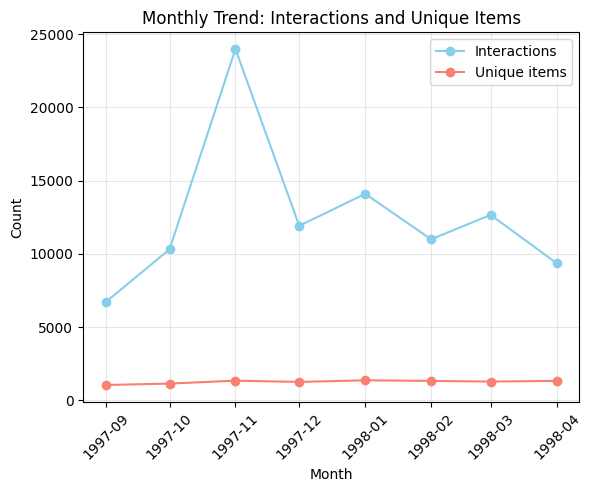

In [18]:
monthly_interactions = df.set_index("timestamp").resample("MS").size()
monthly_unique_items = df.set_index("timestamp").resample("MS")["item_id"].nunique()

plt.figure()
plt.plot(monthly_interactions.index, monthly_interactions.values, marker="o", color="skyblue", label="Interactions")
plt.plot(monthly_unique_items.index, monthly_unique_items.values, marker="o", color="salmon", label="Unique items")
plt.title("Monthly Trend: Interactions and Unique Items")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

Тренд появления новых айтемов

In [19]:
df_month = df.copy()
df_month["month"] = df_month["timestamp"].dt.to_period("M")
months = df_month["month"].sort_values().unique()

items_by_month = (
    df_month.groupby("month")["item_id"]
    .apply(lambda s: set(s.unique()))
    .sort_index()
)

rows = []
seen_before = set()

for m in items_by_month.index:
    cur = items_by_month.loc[m]
    new = cur - seen_before
    returning = cur.intersection(seen_before) 

    rows.append({
        "month": m.to_timestamp(),
        "unique_items": len(cur),
        "new_items": len(new),
        "returning_items": len(returning),
        "new_share": (len(new) / len(cur)) if len(cur) else np.nan,
    })
    seen_before = seen_before.union(cur)  

trend = pd.DataFrame(rows).set_index("month")

print(trend)

            unique_items  new_items  returning_items  new_share
month                                                          
1997-09-01          1044       1044                0   1.000000
1997-10-01          1141        195              946   0.170903
1997-11-01          1340        178             1162   0.132836
1997-12-01          1255         76             1179   0.060558
1998-01-01          1365         73             1292   0.053480
1998-02-01          1323         42             1281   0.031746
1998-03-01          1280         31             1249   0.024219
1998-04-01          1327         43             1284   0.032404


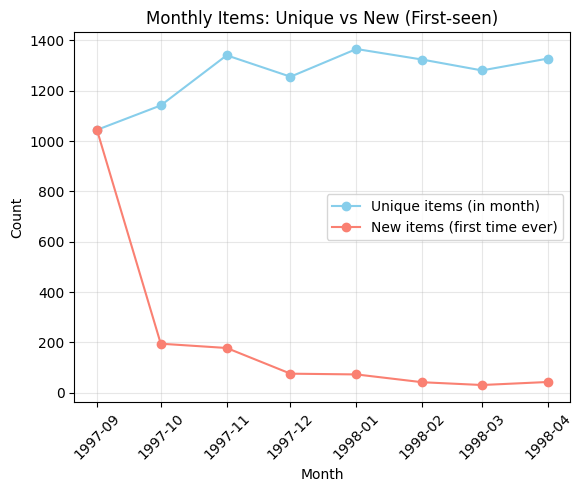

In [20]:
plt.figure()
plt.plot(trend.index, trend["unique_items"].values, marker="o", color="skyblue", label="Unique items (in month)")
plt.plot(trend.index, trend["new_items"].values, marker="o", color="salmon", label="New items (first time ever)")
plt.title("Monthly Items: Unique vs New (First-seen)")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

Тренд появления новых пользоватлеей

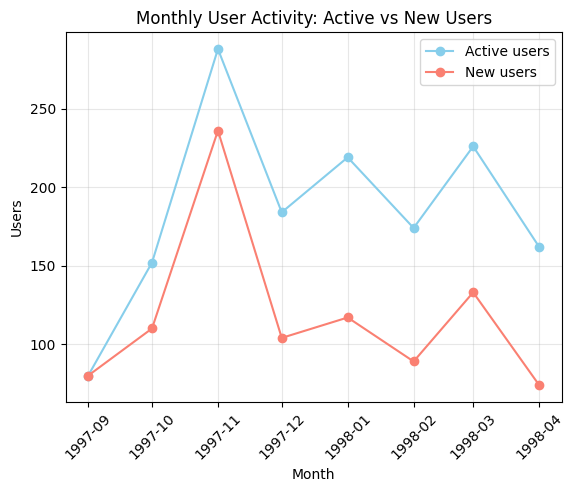

In [21]:
monthly_active_users = df.set_index("timestamp").resample("MS")["user_id"].nunique()

first_seen = df.groupby("user_id")["timestamp"].min()
monthly_new_users = first_seen.dt.to_period("M").value_counts().sort_index()
monthly_new_users.index = monthly_new_users.index.to_timestamp()  

plt.figure()
plt.plot(monthly_active_users.index, monthly_active_users.values, marker="o", color="skyblue", label="Active users")
plt.plot(monthly_new_users.index, monthly_new_users.values, marker="o", color="salmon", label="New users")
plt.title("Monthly User Activity: Active vs New Users")
plt.xlabel("Month")
plt.ylabel("Users")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()